<H1> Session 1 - Analysing Transaction Data </H1>

In this session we will be analysing transaction data.
<br>
The data consist of transaction details that were executed within a specific time window.

In [1]:
# Declare the libraries that will be used
import pandas as pd
# Used to plot the results
import matplotlib.pyplot as plt
from matplotlib import style
style.use('ggplot')

In [2]:
url = 'http://samplecsvs.s3.amazonaws.com/SalesJan2009.csv'

# Use pandas to import data
orig_df = pd.read_csv(url)

# To keep original dataframe for referencing
df = orig_df.copy()
print('List of attributes:', df.columns.values.tolist())

List of attributes: ['Transaction_date', 'Product', 'Price', 'Payment_Type', 'Name', 'City', 'State', 'Country', 'Account_Created', 'Last_Login', 'Latitude', 'Longitude']


In [3]:
print(df.head())

  Transaction_date   Product Price Payment_Type               Name  \
0      1/2/09 6:17  Product1  1200   Mastercard           carolina   
1      1/2/09 4:53  Product1  1200         Visa             Betina   
2     1/2/09 13:08  Product1  1200   Mastercard  Federica e Andrea   
3     1/3/09 14:44  Product1  1200         Visa              Gouya   
4     1/4/09 12:56  Product2  3600         Visa            Gerd W    

                           City     State         Country Account_Created  \
0                      Basildon   England  United Kingdom     1/2/09 6:00   
1  Parkville                           MO   United States     1/2/09 4:42   
2  Astoria                             OR   United States    1/1/09 16:21   
3                        Echuca  Victoria       Australia   9/25/05 21:13   
4  Cahaba Heights                      AL   United States  11/15/08 15:47   

     Last_Login   Latitude   Longitude  
0   1/2/09 6:08  51.500000   -1.116667  
1   1/2/09 7:49  39.195000  -94.68

In [4]:
print(df.dtypes)

Transaction_date     object
Product              object
Price                object
Payment_Type         object
Name                 object
City                 object
State                object
Country              object
Account_Created      object
Last_Login           object
Latitude            float64
Longitude           float64
dtype: object


In [5]:
# Convert object types
df['Transaction_date'] = pd.to_datetime(df['Transaction_date'])
df['Account_Created'] = pd.to_datetime(df['Account_Created'])
df['Last_Login'] = pd.to_datetime(df['Last_Login'])

print(df.dtypes)

Transaction_date    datetime64[ns]
Product                     object
Price                       object
Payment_Type                object
Name                        object
City                        object
State                       object
Country                     object
Account_Created     datetime64[ns]
Last_Login          datetime64[ns]
Latitude                   float64
Longitude                  float64
dtype: object


In [6]:
# Convert prices to numeric in order to access math functions
df['Price'] = df['Price'].str.replace(',','')
df['Price'] = pd.to_numeric(df['Price'])
print(df.dtypes)

Transaction_date    datetime64[ns]
Product                     object
Price                        int64
Payment_Type                object
Name                        object
City                        object
State                       object
Country                     object
Account_Created     datetime64[ns]
Last_Login          datetime64[ns]
Latitude                   float64
Longitude                  float64
dtype: object


In [7]:
# Use general apply function
caps = lambda x: x.upper()

# def caps(x):
#     return x.upper()

df['Country'] = df['Country'].apply(caps)

def test(x):
    if x == "Product1":
        return "P1"
    else:
        return x

df['Product'] = df['Product'].apply(test)

In [8]:
# New column to calculate logins within a week
df['Login_week'] = ""

def lastweek(x):
    date = pd.Timestamp(2009, 2, 2)
    date_diff= pd.Timedelta(date-x).days
    if date_diff < 7:
        return "Last week"
    else:
        return "Not last week"
    
df['Login_week'] = df['Last_Login'].apply(lastweek)

In [9]:
print(df[ df['Login_week']=='Last week' ])

       Transaction_date   Product  Price Payment_Type           Name  \
289 2009-01-26 03:43:00        P1   1200   Mastercard          Wendy   
290 2009-01-26 03:49:00  Product2   3600   Mastercard           Jane   
291 2009-01-11 13:16:00  Product2   3600         Visa         shelby   
292 2009-01-22 15:32:00        P1   1200   Mastercard           Tara   
293 2009-01-09 14:25:00        P1   1200         Amex          James   
294 2009-01-21 11:28:00        P1    800         Amex       Heloise    
295 2009-01-01 14:19:00        P1   1200   Mastercard        Gabriel   
296 2009-01-26 04:30:00        P1   1200         Visa         Jodie    
297 2009-01-07 04:45:00        P1   1200         Amex         Jeremy   
298 2009-01-11 12:12:00        P1   1200         Visa          Helga   
299 2009-01-26 10:24:00        P1   1200         Visa        Eleanor   
300 2009-01-26 08:58:00        P1   1200       Diners           Miss   
301 2009-01-07 17:51:00        P1   1200         Visa          M

In [10]:
# Select all rows with payment types
amex = df.loc[:,['Price','Payment_Type']]
amex = amex[ amex['Payment_Type'] == 'Amex' ]

diners = df.loc[:,['Price','Payment_Type']]
diners = diners[diners['Payment_Type'] == 'Diners']

mc = df.loc[:,['Price','Payment_Type']]
mc = mc[mc['Payment_Type'] == 'Mastercard']

visa = df.loc[:,['Price','Payment_Type']]
visa = visa[visa['Payment_Type'] == 'Visa']

result = [amex, diners, mc, visa]
result_concat = pd.concat([amex, diners, mc, visa], keys={'amex': amex,
                                                          'diners': diners,
                                                          'mc': mc,
                                                          'visa': visa})
sum_amex = sum(amex['Price'])
sum_diners = sum(diners['Price'])
sum_mc = sum(mc['Price'])
sum_visa = sum(visa['Price'])

# Printing all purchases with each payment type
print("Sum of purchases with Amex is {}".format(sum_amex))
print("Sum of purchases with Diners is {}".format(sum_diners))
print("Sum of purchases with Mastercard is {}".format(sum_mc))
print("Sum of purchases with Visa is {}".format(sum_visa))

Sum of purchases with Amex is 188900
Sum of purchases with Diners is 133800
Sum of purchases with Mastercard is 458450
Sum of purchases with Visa is 849350


In [11]:
# Saving new dataframe to csv
result_concat.to_csv('result_dataframe.csv', encoding='utf8')

In [12]:
# Get the total number of transactions for each payment type
payment_values = df['Payment_Type'].value_counts().to_frame()
print(payment_values)

            Payment_Type
Visa                 522
Mastercard           277
Amex                 110
Diners                89


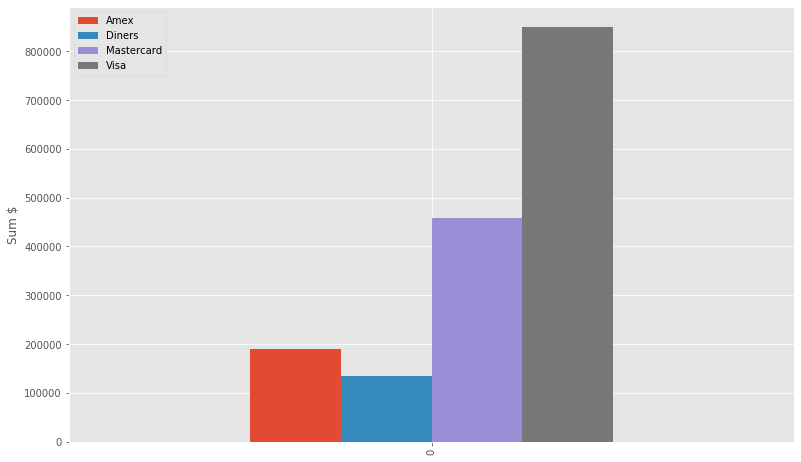

In [14]:
# Plotting results

# Creating new dataframe to be plotted
df_plot = pd.DataFrame([[sum_amex, sum_diners, sum_mc, sum_visa]])
df_plot.columns = ['Amex', 'Diners', 'Mastercard', 'Visa']

df_plot.plot.bar(figsize=(13,8))

plt.legend(loc=2)
plt.ylabel('Sum $')
plt.show()